# Introduction

    Simplify any activities happening outside the model core area.

    Method:
     1: Identify which legs touch the boundary area
     2: Keep the relevant legs/activities and drop the remaining components
     3: Infill: create any new legs between external activities as necessary
     4: Ensure plan consistency: start/end times, sequences, etc
     5 (optional) : Rename activities to "external"
     6 (optional) : Crop the leg geometries to start/stop at the core area boundaries 


In [1]:
import sys
import os
sys.path.insert(0, os.path.join('..','pam'))

In [2]:
import matplotlib.pyplot as plt
from copy import deepcopy
from pam.core import Population, Household, Person
from pam import cropping
from pam.activity import Activity, Leg, Plan
from pam.utils import minutes_to_datetime as mtdt
from pam.variables import END_OF_DAY
import pam
from shapely.geometry import Point
import geopandas as gp
from copy import deepcopy

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
%load_ext autoreload
%autoreload 2

# Data

Create a simple plan:

In [4]:
plan = Plan()
plan.day = [
    Activity(seq=1, act='home', loc=Point(519811,154726),
             start_time=mtdt(0), end_time=mtdt(420)),
    Leg(seq=1, mode='car', start_loc=Point(519811,154726), end_loc=Point(526465,162750),
        start_time=mtdt(420), end_time=mtdt(480), distance=1000),
    Activity(seq=2, act='shop', loc=Point(526465,162750),
             start_time=mtdt(480), end_time=mtdt(510)),
    Leg(seq=2, mode='car', start_loc=Point(526465,162750), end_loc=Point(524117,169062),
        start_time=mtdt(510), end_time=mtdt(540), distance=1000),
    Activity(seq=3, act='work', loc=Point(524117,169062),
             start_time=mtdt(540), end_time=mtdt(800)),
    Leg(seq=3, mode='walk', start_loc=Point(524117,169062), end_loc=Point(543738,152279),
        start_time=mtdt(800), end_time=mtdt(900), distance=1000),
    Activity(seq=4, act='medical', loc=Point(543738,152279),
             start_time=mtdt(900), end_time=mtdt(960)),
    Leg(seq=4, mode='walk', start_loc=Point(543738,152279), end_loc=Point(557976,160304),
        start_time=mtdt(960), end_time=mtdt(990), distance=1000),
    Activity(seq=5, act='other', loc=Point(557976,160304),
             start_time=mtdt(990), end_time=mtdt(1010)),
    Leg(seq=5, mode='walk', start_loc=Point(557976,160304), end_loc=Point(556655,169943),
        start_time=mtdt(1010), end_time=mtdt(1030), distance=1000),
    Activity(seq=6, act='other', loc=Point(556655,169943),
             start_time=mtdt(1030), end_time=mtdt(1060)),
    Leg(seq=6, mode='walk', start_loc=Point(556655,169943), end_loc=Point(541046,167154),
        start_time=mtdt(1060), end_time=mtdt(1100), distance=1000),
    Activity(seq=7, act='other', loc=Point(541046,167154),
             start_time=mtdt(1100), end_time=mtdt(1200)),
    Leg(seq=7, mode='car', start_loc=Point(541046,167154), end_loc=Point(519811,154726),
        start_time=mtdt(1200), end_time=mtdt(1210), distance=1000),
    Activity(seq=8, act='home', loc=Point(519811,154726),
             start_time=mtdt(1210), end_time=END_OF_DAY)
]
    
hh = Household(1, loc=Point(519811,154726))
population = Population()
person = Person(1)
person.plan = plan
hh.add(person)
population.add(hh)

The core area scope is defined as a geometry:

In [18]:
boundary = gp.read_file(os.path.join('..','tests','test_data','test_geometry.geojson'))
boundary = boundary.dissolve().geometry[0]
# boundary

In [8]:
def plot_legs(plan: Plan):
    for i, leg in enumerate(plan.legs):
        path = cropping.get_leg_path(leg)
        plt.annotate(
            i,
            xy=(path.xy[0][1], path.xy[1][1]),
            xytext=(path.xy[0][0], path.xy[1][0]),
            arrowprops={"arrowstyle": "->", "color": "gray"}
        )

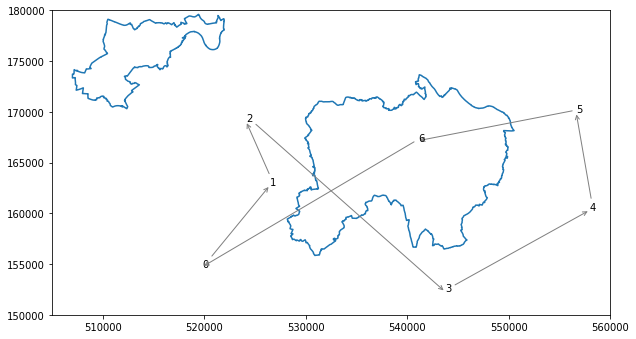

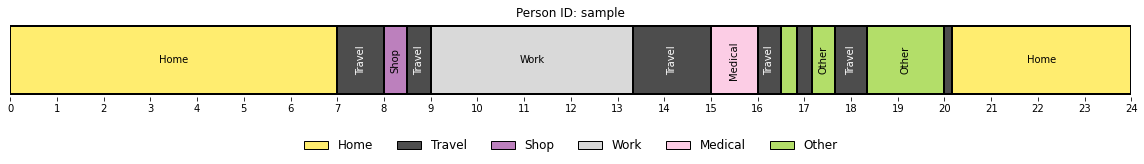

In [15]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
gp.GeoSeries([boundary]).boundary.plot(ax=ax)
plot_legs(plan)
plt.xlim(505000, 560000)
plt.ylim(150000, 180000)

plan.plot()

# Examples

In [10]:
plan_cropped = deepcopy(plan)
cropping.simplify_external_plans(plan_cropped, boundary)

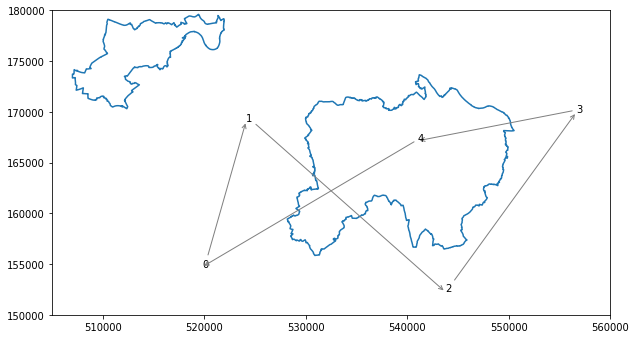

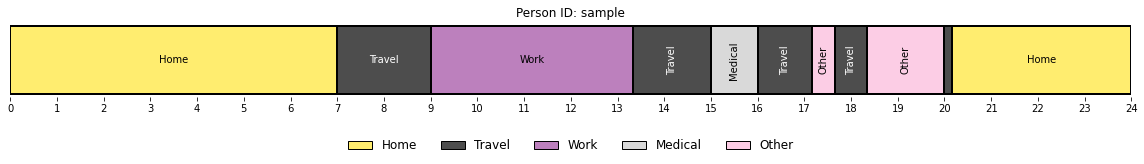

In [16]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
gp.GeoSeries([boundary]).boundary.plot(ax=ax)
plot_legs(plan_cropped)
plt.xlim(505000, 560000)
plt.ylim(150000, 180000)

plan_cropped.plot()